In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('spam.csv', encoding='latin1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
from sklearn.preprocessing import LabelEncoder
encode=LabelEncoder()
df.target=encode.fit_transform(df['target'])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.duplicated().sum()

403

In [12]:
df=df.drop_duplicates(keep='first')

In [13]:
df.shape

(5169, 2)

In [14]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x28de0f6c260>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')])

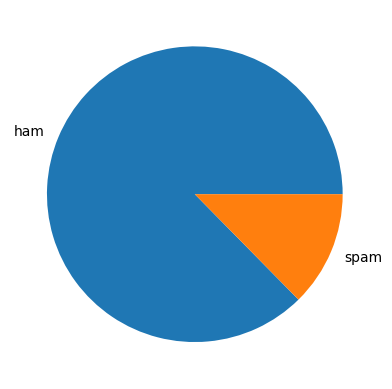

In [15]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'])

In [16]:
df['num_chars']=df['text'].apply(len)
df.head()

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [17]:
df['words']=df['text'].apply(lambda x: len(str(x).split(' ')))

df.head()


,target,text,num_chars,words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [18]:
df['num_sentences'] = df['text'].apply(
    lambda x: len([s for s in x.replace('!', '.').replace('?', '.').split('.') if s.strip()])
)
df.head()

,target,text,num_chars,words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1


In [19]:
df[['num_chars', 'words', 'num_sentences']].describe()

,num_chars,words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.455988,2.304508
std,58.236293,11.163853,1.639932
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,31.000000


In [20]:
df[df['target']==1][['num_chars', 'words', 'num_sentences']].describe()

,num_chars,words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.728943,3.722818
std,30.137753,5.985799,1.792465
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,4.000000
75%,157.000000,28.000000,5.000000
max,224.000000,35.000000,10.000000


In [21]:
df[df['target']==0][['num_chars', 'words', 'num_sentences']].describe()

,num_chars,words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.259743,2.099424
std,56.358207,11.231781,1.510418
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,2.000000
75%,90.000000,19.000000,3.000000
max,910.000000,171.000000,31.000000


<Axes: xlabel='num_chars', ylabel='Count'>

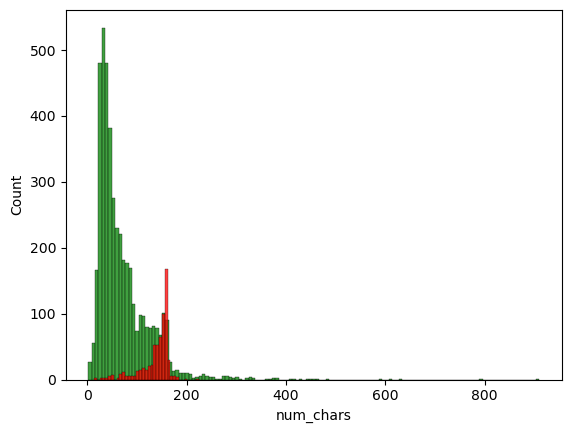

In [22]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_chars'], color='green')
sns.histplot(df[df['target']==1]['num_chars'], color='red')


<Axes: >

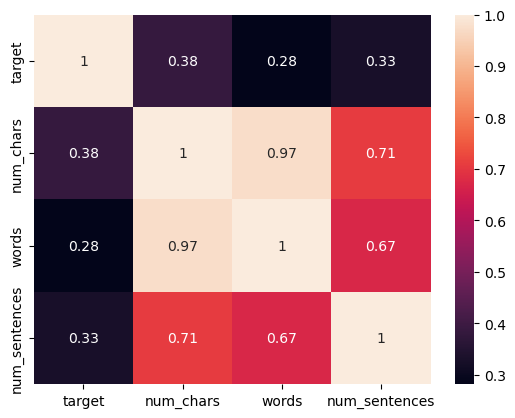

In [23]:
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True)

In [24]:
import string
import nltk
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
stopwords = {
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves',
    'you', 'your', 'yours', 'yourself', 'yourselves',
    'he', 'him', 'his', 'himself', 'she', 'her', 'hers',
    'herself', 'it', 'its', 'itself', 'they', 'them', 'their',
    'theirs', 'themselves', 'what', 'which', 'who', 'whom',
    'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was',
    'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having',
    'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but',
    'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
    'by', 'for', 'with', 'about', 'against', 'between', 'into',
    'through', 'during', 'before', 'after', 'above', 'below',
    'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over',
    'under', 'again', 'further', 'then', 'once', 'here', 'there',
    'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each',
    'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor',
    'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very',
    'can', 'will', 'just', 'don', 'should', 'now'
}
def transform(text):
    text = text.lower()
    words = text.split()
    y = []
    
    for word in words:
        # Remove non-alphanumeric characters from word
        cleaned = ''.join(char for char in word if char.isalnum())
        
        # Only keep if result is not empty
        if cleaned:
            y.append(cleaned)
    text=y[:]
    y.clear()
    for word in text:
        if word not in stopwords and word not in string.punctuation:
            y.append(word)

    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)



In [25]:
transform('Hi how%%% are%  u!! i love machine learning')

'hi u love machin learn'

In [26]:
df['text']=df['text'].apply(transform)
df.head()

,target,text,num_chars,words,num_sentences
0,0,go jurong point crazi avail bugi n great world...,111,20,3
1,0,ok lar joke wif u oni,29,6,2
2,1,free entri 2 wkli comp win fa cup final tkt 21...,155,28,2
3,0,u dun say earli hor u c alreadi say,49,11,2
4,0,nah dont think goe usf live around though,61,13,1


In [27]:
%pip install wordcloud
from wordcloud import WordCloud

Note: you may need to restart the kernel to use updated packages.


In [28]:
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [29]:
spam_wc=wc.generate(df[df['target']==1]['text'].str.cat(sep=' '))


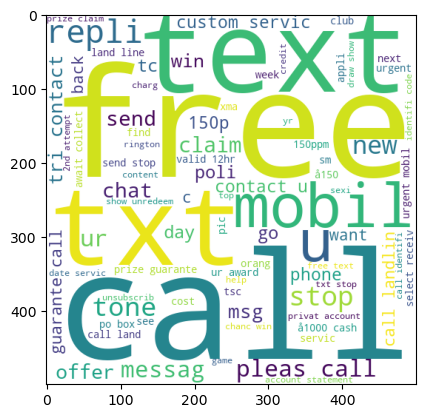

In [30]:
plt.imshow(spam_wc)

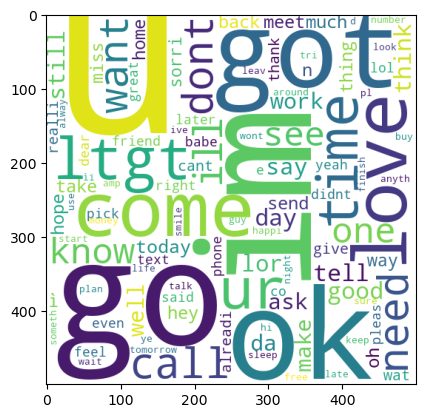

In [31]:
ham_wc=wc.generate(df[df['target']==0]['text'].str.cat(sep=' '))
plt.imshow(ham_wc)

In [32]:
spam_word=[]
for i in df[df['target']==1]['text'].tolist():
    for wor in i.split():
        spam_word.append(wor)
len(spam_word)

10909

In [33]:
from collections import Counter
pd.DataFrame(Counter(spam_word).most_common(50))

,0,1
0,call,321
1,free,188
2,2,155
3,txt,137
4,u,123
5,text,121
6,ur,119
7,mobil,114
8,stop,103
9,repli,100


In [34]:
ham_word=[]
for word in df[df['target']==0]['text'].tolist():
    for j in word.split():
        ham_word.append(j)
len(ham_word)

37085

In [35]:
ham=pd.DataFrame(Counter(ham_word).most_common(50))
ham.head()

,0,1
0,u,878
1,im,435
2,go,401
3,get,352
4,2,288


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
cv = CountVectorizer(max_features=3000)
tf = TfidfTransformer()

In [37]:
X_c = cv.fit_transform(df['text'])  # X will be a sparse matrix, memory efficient
X=tf.fit_transform(X_c)

In [38]:
X.shape

(5169, 3000)

In [39]:
y=df['target'].values

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [41]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [42]:
mnb.fit(X_train,y_train)
y_pred1=mnb.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

0.9758220502901354
1.0


<Axes: >

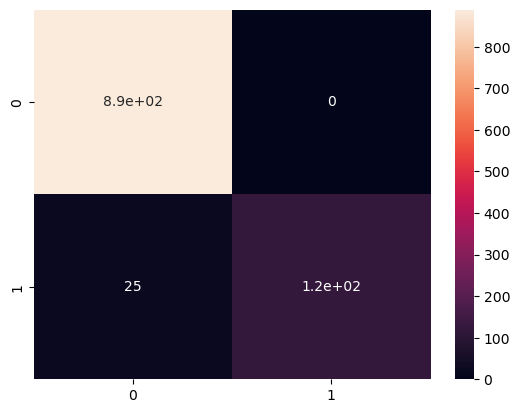

In [44]:
a=accuracy_score(y_test,y_pred1)
print(a)
p=precision_score(y_test,y_pred1)
print(p)
confusion_matrix(y_test,y_pred1)
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True)

In [45]:
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))